<a href="https://colab.research.google.com/github/Wamae/cifar-10/blob/main/cnn_cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential # Needded to create CNN layers
from tensorflow.keras.optimizers import Adam # Used to optimize logits in multi-dimensional space
from tensorflow.keras.layers import Dense # Used to create CNN layers
from tensorflow.keras.layers import Conv2D # Used to create convolutions layers
from tensorflow.keras.layers import Dropout # Used to reduce overfitting
from tensorflow.keras.layers import BatchNormalization # Helps speed up training by normalising the activation functions, reaching minima faster; Works better with Dropout
from tensorflow.keras.layers import MaxPooling2D # Summarizes the most important pixels in the images
from tensorflow.keras.layers import Flatten # Unwravels matrix into an array i.e. 1D feature vector to pass appropriate input into fully connected layer i.e Dense
from tensorflow.keras.layers import Activation # Creates activation function that flattens the results between 0-1 i.e probabilities
import matplotlib.pyplot as plt # Needed for data analysis
import numpy as np # Used for matrix manipulation
from tensorflow.keras import models # loads models library to create CNN
from tensorflow.keras import layers
BATCH_NUM = 64 # Numbers of batches to process


## Data Exploration

In [3]:
 # the data, split between train and test sets
data = (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = data[0][0]
y_train = data[0][1]
x_test_train = data[1][0]
y_test = data[1][1]
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

170498071/170498071 [==============================] - 13s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [4]:
NUM_CLASSES = np.max(y_train) + 1 # Number of outputs
NUM_CLASSES

10

In [5]:
type(x_train)

numpy.ndarray

In [6]:
x_train.ndim

4

In [7]:
len(x_train[0])

32

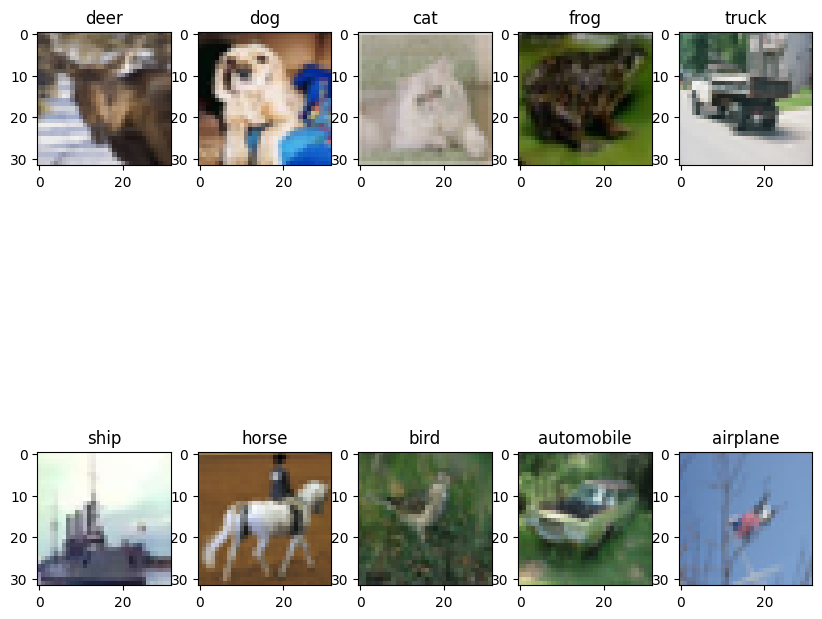

In [8]:
# Get the list of class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Randomly select 10 unique classes
unique_classes = np.random.choice(np.arange(NUM_CLASSES), size=NUM_CLASSES, replace=False)

# Initialize figure to display images
fig = plt.figure(figsize=(10, 10))

for i in range(NUM_CLASSES):
    # Get the indices of images belonging to the current class
    indices = np.where(y_train == unique_classes[i])[0]

    # Randomly select one image from the current class
    idx = np.random.choice(indices)

    # Add subplot to display the image
    # row, column, index
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_title(class_names[unique_classes[i]])
    plt.imshow(x_train[idx])

# Show the plot with the selected images
plt.show()

In [9]:
index_class_dict = dict(enumerate(class_names))
index_class_dict.values()


dict_values(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

In [10]:
import plotly.express as px
import pandas as pd

# Create a DataFrame for visualization
df_explore_train = pd.DataFrame({'Class': y_train.ravel(), 'Dataset': 'Training'})
df_explore_test = pd.DataFrame({'Class': y_test.ravel(), 'Dataset': 'Testing'})

# Create the count plot for training data
fig_train = px.bar(df_explore_train, x='Class', title='Distribution of Classes in Training Data')
fig_train.update_xaxes(title='Classes')
fig_train.update_yaxes(title='Count')

# Show the plot for training data
fig_train.show()

In [11]:
# Create the count plot for training data
fig_train = px.bar(df_explore_test, x='Class', title='Distribution of Classes in Testing Data')
fig_train.update_xaxes(title='Classes')
fig_train.update_yaxes(title='Count')

# Show the plot for training data
fig_train.show()

In [12]:
x_train.shape

(50000, 32, 32, 3)

In [13]:
from tensorflow.keras.utils import to_categorical

# Normalizing
x_train=x_train/255
x_test=x_test/255

#One hot encoding
y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

In [14]:
def get_cnn_model():

  # create a sequential model i.e. empty neural network which has no layers in it.
  model=models.Sequential()

  #==================== Feature Detection / extraction Block ====================#

  # Add first convolutional block - To deal with images we use Conv2D and for colour images and shape use Conv3D
  #model.add(layers.Conv2D(filters=6, kernal_size(3,3), input_shape=(32,32,1), activation='relu'))
  # in the first block we need to mention input_shape
  model.add(layers.Conv2D(64,(3,3),input_shape=(32,32,3),activation='relu'))
  model.add(layers.Conv2D(64,(3,3),input_shape=(32,32,3),activation='relu'))
  # Add the max pooling layer
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))

  # Add Second convolutional block
  #model.add(layers.Conv2D(filters=6, kernal_size(3,3), activation='relu'))
  model.add(layers.Conv2D(128,(3,3),activation='relu'))
  model.add(layers.Conv2D(128,(3,3),activation='relu'))
  # Add the max pooling layer
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.3))

  # Add Third convolutional block
  #model.add(layers.Conv2D(filters=6, kernal_size(3,3), activation='relu'))
  model.add(layers.Conv2D(256,(3,3),activation='relu'))
  # model.add(layers.Conv2D(256,(3,3),activation='relu'))
  # Add the max pooling layer
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5))

  #==================== Transition Block (from feature detection to classification) ====================#

  # Add Flatten layer. Flatten simply converts matrics to array
  model.add(layers.Flatten(input_shape=(32,32))) # this will flatten the image and after this Classification happens

  #==================== Classification Block ====================#

  # Classification segment - fully connected network
  # The Dence layer does classification and is deep neural network. Dense layer always accept the array.
  model.add(layers.Dense(128, activation='relu')) # as C5 layer in above image.
  model.add(layers.Dense(100, activation='relu')) # as C5 layer in above image.
  model.add(layers.Dense(80, activation='relu')) # as C5 layer in above image.
  # model.add(layers.Dense(60, activation='relu')) # as C5 layer in above image
  # model.add(layers.Dense(40, activation='relu')) # as C5 layer in above image
  # this 120 is hyper parameter whcih is number of neuron
  #model.add(layers.Dense(84, activation='relu'))# as F6 layer in aboave image

  # Add the output layer as Output layer in above image.
  # The output layer normally have softmax activation to covert the values into probabilities
  # for the 10 classes
  model.add(Dense(10,activation='softmax'))


  return model

In [15]:
model1 = get_cnn_model()
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 128)       147584    
                                                        

In [16]:
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history1=model1.fit(x_train,y_train_cat,epochs=20,validation_data=(x_test,y_test_cat))

Epoch 1/20
1563/1563 [==============================] - 22s 9ms/step - loss: 1.8557 - accuracy: 0.2921 - val_loss: 1.5125 - val_accuracy: 0.4414
Epoch 2/20
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4605 - accuracy: 0.4662 - val_loss: 1.3122 - val_accuracy: 0.5279
Epoch 3/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3082 - accuracy: 0.5303 - val_loss: 1.2453 - val_accuracy: 0.5478
Epoch 4/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2091 - accuracy: 0.5706 - val_loss: 1.1488 - val_accuracy: 0.5976
Epoch 5/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1489 - accuracy: 0.5928 - val_loss: 1.0952 - val_accuracy: 0.6168
Epoch 6/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0852 - accuracy: 0.6200 - val_loss: 1.0106 - val_accuracy: 0.6440
Epoch 7/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0423 - accuracy: 0.6353 - val_loss: 0.9797 - val_a

In [17]:
evaluation = model1.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.8233 - accuracy: 0.7242
Test Accuracy: 0.7242000102996826


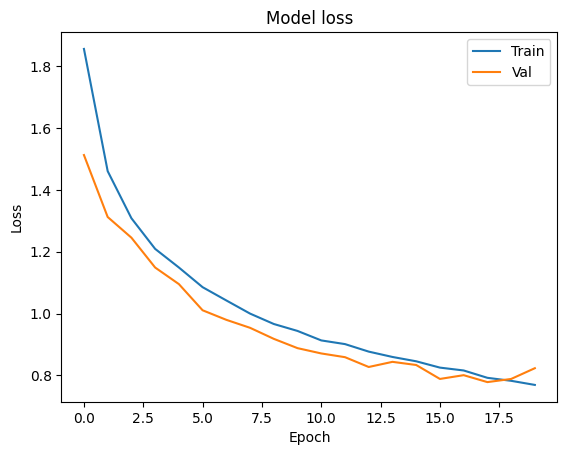

In [18]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

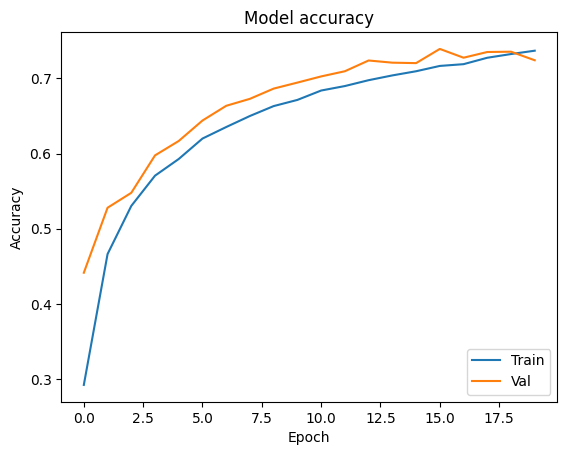

In [19]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [20]:
model2 = get_cnn_model()
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 conv2d_8 (Conv2D)           (None, 10, 10, 128)       147584    
                                                      

In [21]:
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history2=model2.fit(x_train,y_train_cat,epochs=20,validation_data=(x_test,y_test_cat))

Epoch 1/20
1563/1563 [==============================] - 17s 9ms/step - loss: 1.8301 - accuracy: 0.3005 - val_loss: 1.4957 - val_accuracy: 0.4551
Epoch 2/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4643 - accuracy: 0.4632 - val_loss: 1.3295 - val_accuracy: 0.5142
Epoch 3/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2994 - accuracy: 0.5326 - val_loss: 1.1640 - val_accuracy: 0.5812
Epoch 4/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1889 - accuracy: 0.5779 - val_loss: 1.0916 - val_accuracy: 0.6197
Epoch 5/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1081 - accuracy: 0.6093 - val_loss: 1.0139 - val_accuracy: 0.6492
Epoch 6/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0528 - accuracy: 0.6305 - val_loss: 0.9495 - val_accuracy: 0.6713
Epoch 7/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0034 - accuracy: 0.6508 - val_loss: 0.9196 - val_ac

In [22]:
evaluation2 = model2.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation2[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.7728 - accuracy: 0.7432
Test Accuracy: 0.7432000041007996


In [23]:
# Get predictions from the model
y_pred = model2.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels to class labels
y_true_classes = np.argmax(y_test_cat, axis=1)

# Create the confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Model 1')
plt.show()

313/313 [==============================] - 1s 2ms/step


NameError: name 'confusion_matrix' is not defined

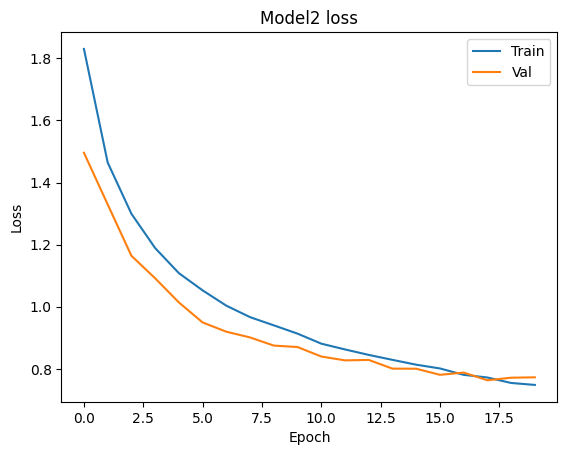

In [24]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model2 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

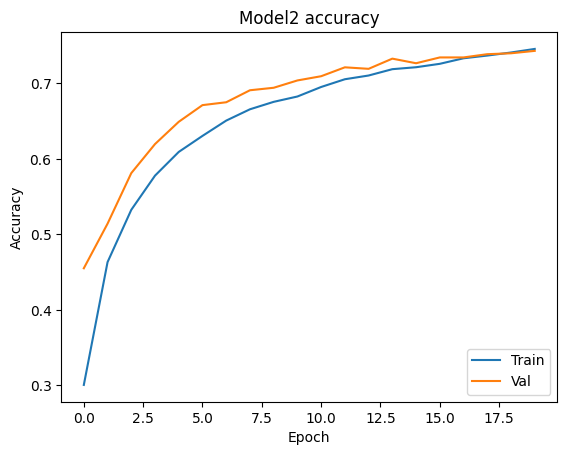

In [25]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model2 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [26]:
def get_cnn_model_with_batch_normalisation():

  # create a sequential model i.e. empty neural network which has no layers in it.
  model=models.Sequential()

  #==================== Feature Detection / extraction Block ====================#

  # Add first convolutional block - To deal with images we use Conv2D and for colour images and shape use Conv3D
  #model.add(layers.Conv2D(filters=6, kernal_size(3,3), input_shape=(32,32,1), activation='relu'))
  # in the first block we need to mention input_shape
  model.add(layers.Conv2D(64,(3,3),input_shape=(32,32,3),activation='relu'))
  model.add(BatchNormalization())
  model.add(layers.Conv2D(64,(3,3),input_shape=(32,32,3),activation='relu'))
  model.add(BatchNormalization())
  # Add the max pooling layer
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))

  # Add Second convolutional block
  #model.add(layers.Conv2D(filters=6, kernal_size(3,3), activation='relu'))
  model.add(layers.Conv2D(128,(3,3),activation='relu'))
  model.add(BatchNormalization())
  model.add(layers.Conv2D(128,(3,3),activation='relu'))
  model.add(BatchNormalization())
  # Add the max pooling layer
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.3))

  # Add Third convolutional block
  #model.add(layers.Conv2D(filters=6, kernal_size(3,3), activation='relu'))
  model.add(BatchNormalization())
  model.add(layers.Conv2D(256,(3,3),activation='relu'))
  model.add(BatchNormalization())
  # model.add(layers.Conv2D(256,(3,3),activation='relu'))
  # Add the max pooling layer
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5))

  #==================== Transition Block (from feature detection to classification) ====================#

  # Add Flatten layer. Flatten simply converts matrics to array
  model.add(layers.Flatten(input_shape=(32,32))) # this will flatten the image and after this Classification happens

  #==================== Classification Block ====================#

  # Classification segment - fully connected network
  # The Dence layer does classification and is deep neural network. Dense layer always accept the array.
  model.add(layers.Dense(128, activation='relu')) # as C5 layer in above image.
  model.add(layers.Dense(100, activation='relu')) # as C5 layer in above image.
  model.add(layers.Dense(80, activation='relu')) # as C5 layer in above image.
  # model.add(layers.Dense(60, activation='relu')) # as C5 layer in above image
  # model.add(layers.Dense(40, activation='relu')) # as C5 layer in above image
  # this 120 is hyper parameter whcih is number of neuron
  #model.add(layers.Dense(84, activation='relu'))# as F6 layer in aboave image

  # Add the output layer as Output layer in above image.
  # The output layer normally have softmax activation to covert the values into probabilities
  # for the 10 classes
  model.add(Dense(10,activation='softmax'))


  return model

In [27]:
model3 = get_cnn_model_with_batch_normalisation()
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 30, 30, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                      

In [28]:
model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history3=model3.fit(x_train,y_train_cat,epochs=20,validation_data=(x_test,y_test_cat))

Epoch 1/20
1563/1563 [==============================] - 22s 12ms/step - loss: 1.5373 - accuracy: 0.4401 - val_loss: 1.2551 - val_accuracy: 0.5565
Epoch 2/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1208 - accuracy: 0.6058 - val_loss: 0.9738 - val_accuracy: 0.6584
Epoch 3/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9579 - accuracy: 0.6651 - val_loss: 0.8941 - val_accuracy: 0.6879
Epoch 4/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8669 - accuracy: 0.7001 - val_loss: 0.8895 - val_accuracy: 0.6961
Epoch 5/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7952 - accuracy: 0.7263 - val_loss: 0.7781 - val_accuracy: 0.7310
Epoch 6/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7364 - accuracy: 0.7473 - val_loss: 0.8223 - val_accuracy: 0.7239
Epoch 7/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6921 - accuracy: 0.7632 - val_loss: 0.7588 -

In [29]:
evaluation3 = model3.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation3[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.6491 - accuracy: 0.7929
Test Accuracy: 0.792900025844574


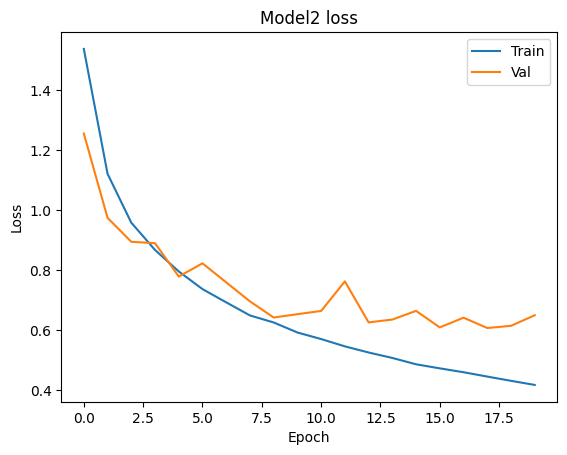

In [30]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model2 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

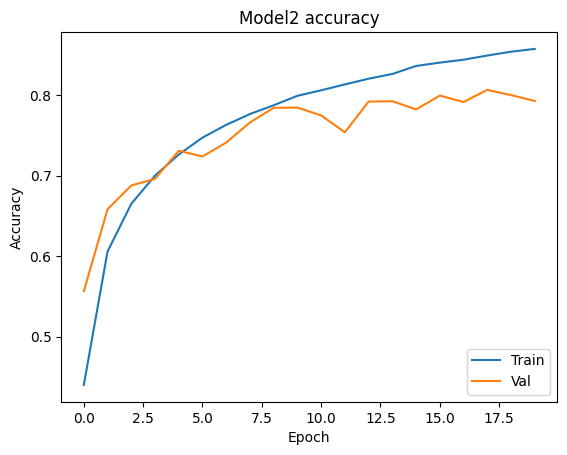

In [31]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model2 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

313/313 [==============================] - 1s 3ms/step


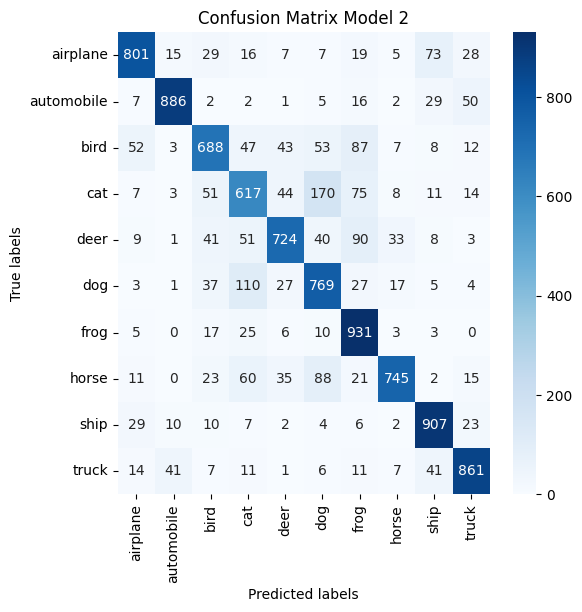

In [32]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions from the model
y_pred = model3.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels to class labels
y_true_classes = np.argmax(y_test_cat, axis=1)

# Create the confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Model 2')
plt.show()

In [ ]:
# !pip install lime

In [ ]:
from lime.lime_image import LimeImageExplainer

explainer = LimeImageExplainer()

In [ ]:
plt.imshow(x_test[6])
plt.show()

In [ ]:
explanation = explainer.explain_instance(x_test[0], classifier_fn=model3.predict)

In [ ]:
from skimage.segmentation import mark_boundaries

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()